# Intro 

In [1]:
#Import needed models
import os
import pandas as pd
from pandas.io.json import json_normalize
import datetime
import numpy as np
import json
import matplotlib.pylab as plt
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 8)

# Part 1 Explatory Data Analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [3]:
# read file in string format
str_data = json.load(open('C:/Users/JR/Documents/Data Science Class/ultimate_challenge/logins.json'))
# using json normalize record the key 'login_time'
logins = json_normalize(str_data, record_path='login_time')
# set the column name to date
logins.columns = ['date']
# add a column 'val' with each row value set to 1 we can group by date and aggregate on 'val' column
logins['val'] = 1
# convert date column to pandas datetime 
logins['date'] = pd.to_datetime(logins['date'])
# set date column as index
logins.set_index('date', inplace=True)

In [4]:
logins.head()

,val
date,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [5]:
def resample(df, interval):
    # resample the dataframe 
    temp_resample = df.resample(interval).count()
    return temp_resample

In [6]:
def interval_plot(df, axis, title, y_label=''):
    plt.subplot(axis)
    plt.plot(df['val'])
    plt.ylabel(y_label)
    plt.title(title)
    plt.tight_layout()

In [8]:
#resampling
min15 = resample(logins, '15Min')
hourly = resample(logins, '60Min')
daily = resample(logins, 'D')
monthly = resample(logins, 'M')

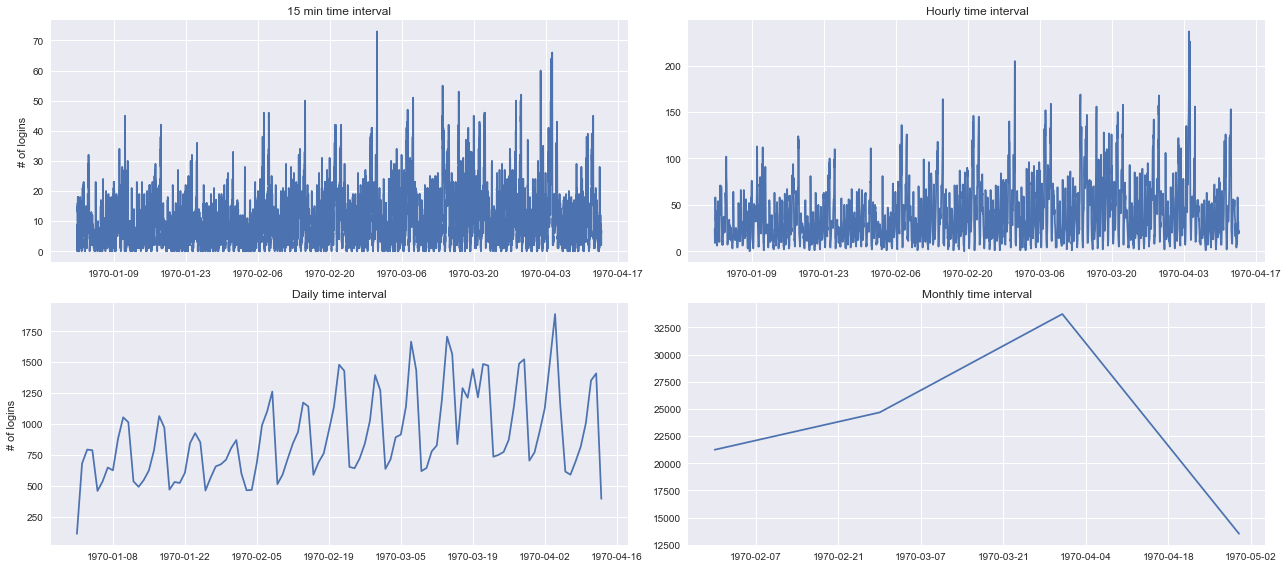

In [9]:
# 15 Min
interval_plot(min15, 221, "15 min time interval", "# of logins")
# Hourly
interval_plot(hourly, 222, "Hourly time interval")
# Daily
interval_plot(daily, 223, "Daily time interval", "# of logins")
# Monthly
interval_plot(monthly, 224, "Monthly time interval")
plt.show()

From the graphs we can see that daily logins are based off of a weekday/weekend schedule and it seems to be that the app is more active during the weekend with a general growth of the app/website. with a down tick in logins after april, that time peroid should be examined so that any changes can be correlated with the down slide.

# Part 2 Experimental and Metrics Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
how you will implement the experiment
what statistical test(s) you will conduct to verify the significance of the observation
how you would interpret the results and provide recommendations to the city operations team along with any caveats.

## Solution

A measure of sucess within the data set would be to look at if their is an increase in the user activity since their are more drivers available in both cities. if more users are logged in then that shows that it was a sucess. A quantitative metric that  could be used is the comparison of the number of times a driver crossed the bridge pre reimbursement and post reimbursement.

Since the standard deviation of customer activity can be found, use a sample z statistic 

$h_0$ : there is no difference between drivers crossing the bridge when the company is not reimbursing drivers for toll costs and when the company is reimbursing drivers for toll cost,
$h_1$ : there is a difference between drivers crossing the bridge when the company is not reimbursing drivers for toll costs and when the company is reimbursing drivers for toll cost

I would then calculate the z-score for the customer activity after implementation of the reimbursement
Then using a 95% confidence interval I would determine whether or not the z-score falls in that range, and observe whether or not the null hypothesis can be rejected
If it can be rejected then I would recommend that the company continue to reimburse toll costs and continue to observe the number of times drivers are crossing the bridge to make sure company money is well spent, and if it is not then maybe introduce surge bonus for the drivers willing to cross.



# Part 3 Predictive Modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provideddata for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention

In [10]:
data = json.load(open('C:/Users/JR/Documents/Data Science Class/ultimate_challenge/ultimate_data_challenge.json'))
df = pd.DataFrame(data)

In [11]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [12]:
#clean data to be used for Analysis 
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [13]:
last_day = max(df['last_trip_date'])
days = [last_day - datetime.timedelta(days=x) for x in range(0, 30)]
df['retained_user'] = df['last_trip_date'].map(lambda x: int(x in days))

In [15]:
# finding the rate at which users are retained 
active_df = df[df['retained_user'] == 1]
non_active_df = df[df['retained_user'] == 0]
percent_active = len(active_df) / len(df) * 100
print('Percentage of Retained users: {0}'.format(percent_active))

Percentage of Retained users: 36.620000000000005


a retention rate above 20% is considered good so we have good retention.

In [17]:
# creating column for active user in DataFrame
df['active_user'] = ((df['last_trip_date'] - df['signup_date']) / np.timedelta64(1, 'M')).\
        map(lambda x: 'active' if x > 5 else 'inactive')

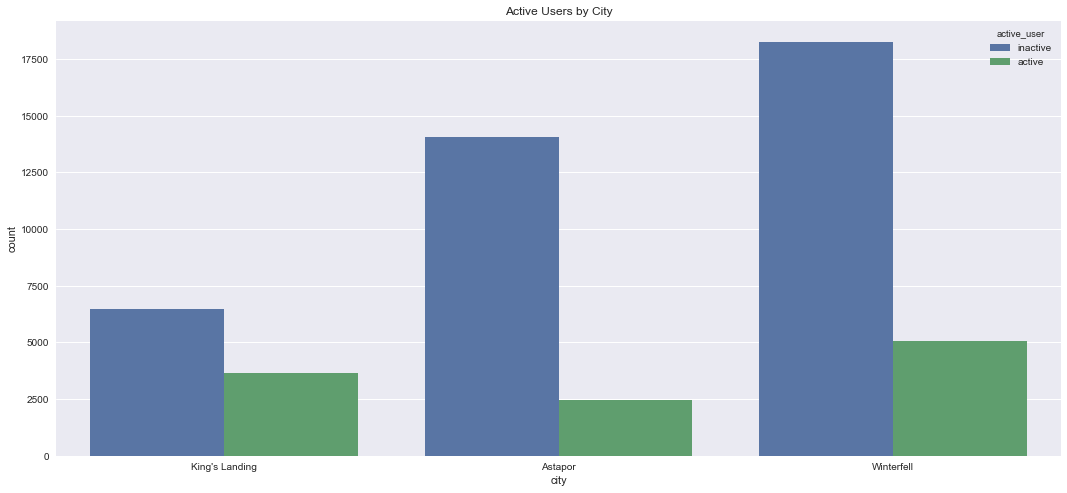

In [18]:
sb.countplot(x='city', hue='active_user', data=df)
plt.title('Active Users by City')
plt.show()

Winterfell has the most active and inactive users, might want to see if it has the largest population or something else is occuring.

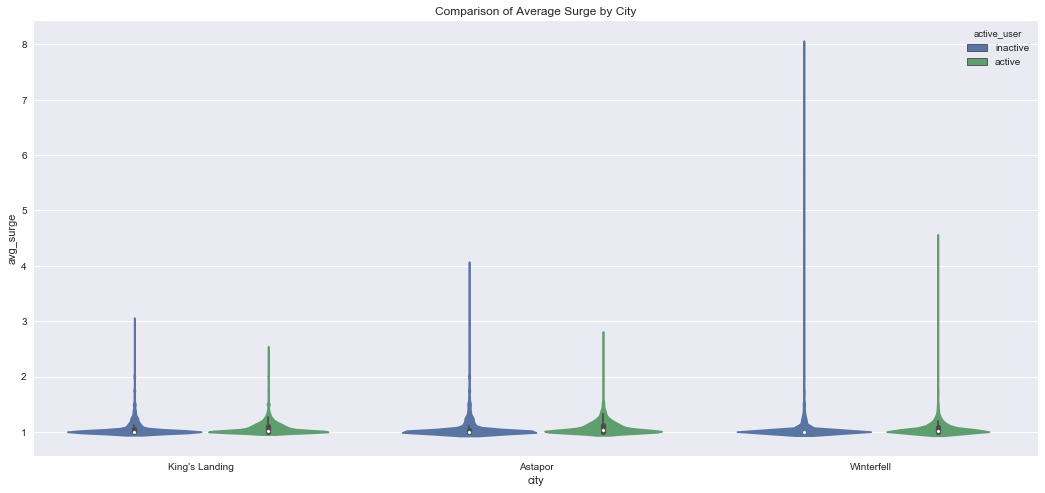

In [19]:
sb.violinplot(x='city', y='avg_surge', hue='active_user', data=df)
plt.title('Comparison of Average Surge by City')
plt.show()

surge is the highest in winterfell as well along with the most users... so they have the most and pay the most.

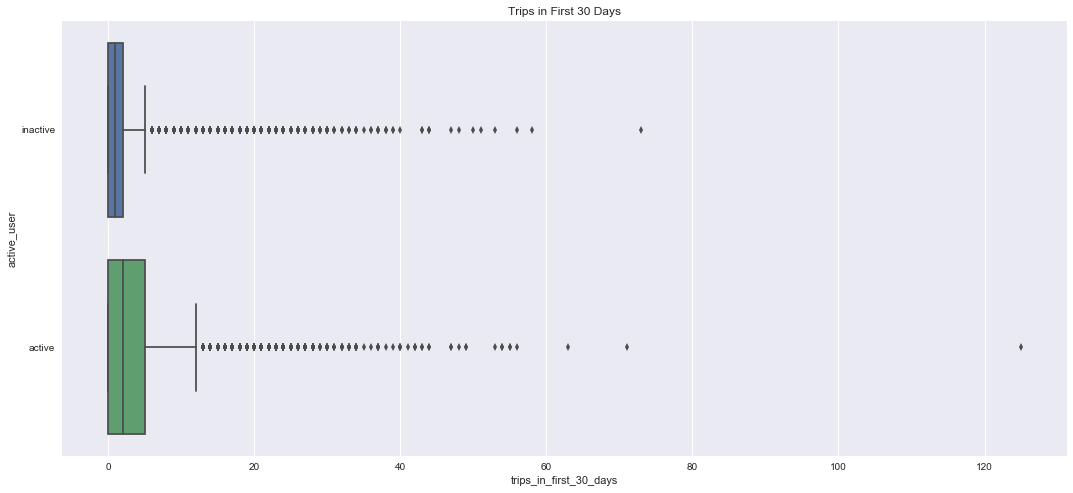

In [20]:
sb.boxplot(x='trips_in_first_30_days', y='active_user', data=df)
plt.title('Trips in First 30 Days')
plt.show()

Most users use the app within 30 days of logging into the app.

# Predictive Modeling

The goal is now to predict whether or not a user will be active in their 6th month. Data cleaning will be needed, scaling will also most likely be needed due to the skewed distrubtions of the values.

In [21]:
#drop data values to make prediction easier and prepare data
prediction_df = df.drop(['last_trip_date', 'phone', 'signup_date', 'surge_pct', 'ultimate_black_user', 'retained_user'], axis=1)
city_dict = {"King's Landing": 1, 'Astapor': 2, 'Winterfell': 3}
active_user_dict = {'inactive': 0, 'active': 1}
prediction_df['city'] = df['city'].replace(city_dict)
prediction_df['active_user'] = df['active_user'].replace(active_user_dict)
prediction_df['combined_avg_driver_rating'] = df[['avg_rating_by_driver', 'avg_rating_of_driver']].mean(axis=1)
prediction_df = prediction_df.drop(['avg_rating_by_driver', 'avg_rating_of_driver'], axis=1)
cols = list(prediction_df.columns.values)
feature_cols = [col for col in cols if col != 'active_user']
prediction_df = prediction_df[feature_cols]
prediction_df.head()

,avg_dist,avg_surge,city,trips_in_first_30_days,weekday_pct,combined_avg_driver_rating
0,3.67,1.10,1,4,46.2,4.85
1,8.26,1.00,2,0,50.0,5.00
2,0.77,1.00,2,3,100.0,4.65
3,2.36,1.14,1,9,80.0,4.75
4,3.13,1.19,3,14,82.4,4.65


In [22]:
prediction_df['combined_avg_driver_rating'] = prediction_df['combined_avg_driver_rating'].fillna(prediction_df['combined_avg_driver_rating'].mean())

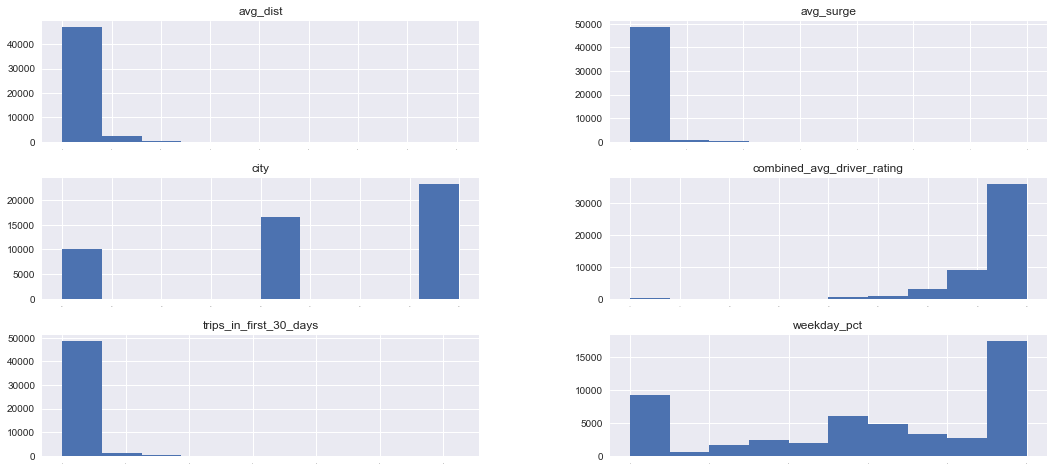

In [23]:
prediction_df.hist(sharex=False, sharey=False, xlabelsize=1)
plt.show()

In [24]:
prediction_df.corr()

,avg_dist,avg_surge,city,trips_in_first_30_days,weekday_pct,combined_avg_driver_rating
avg_dist,1.000000,-0.081491,0.011120,-0.136329,0.101652,0.080037
avg_surge,-0.081491,1.000000,-0.013036,-0.001841,-0.110071,-0.009590
city,0.011120,-0.013036,1.000000,0.011517,-0.026142,-0.126662
trips_in_first_30_days,-0.136329,-0.001841,0.011517,1.000000,0.050388,-0.041933
weekday_pct,0.101652,-0.110071,-0.026142,0.050388,1.000000,0.021002
combined_avg_driver_rating,0.080037,-0.009590,-0.126662,-0.041933,0.021002,1.000000


In [25]:
prediction_df['active_user'] = df['active_user'].replace(active_user_dict)
prediction_df['active_user'].value_counts()

0    38806
1    11194
Name: active_user, dtype: int64

In [27]:
print(len(prediction_df[prediction_df['active_user'] == 1]) / len(df) * 100)

22.387999999999998


This is a binary classification problem, we will use test the following models: logistic regression, K-Nearest Neighbors, and a Decision Tree Classifier. we will then test and imporve upon the models using: Adaboost, Gradient Boosted Decision Tree, Random Forest, and Extremely Randomized Decision Tree.

Since only 22% of users were active in their 6th month, we only will get a correct prediction 78% of the time so accuracy may not be the best model to measure performance so a receiving operating characteristic (ROC) curve will be used. This curve plots the the fraction of true positives out of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), at various threshold settings.

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [29]:
# split out into train and test

array = prediction_df.values

X = array[:,0:6].astype(float)
y = array[:,6]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Model details

Logistic regression is one of the go-to models used for binary classification and is known as a discriminative classifier. we wish to find the line which divides the samples between users that were active after 6 months and users that were not, it does this by splitting things into two probability groups 0.5 and not 0.5

K-Nearest Neighbors(KNN) is that samples close to each other in feature-space share a label. KNN does this by scanning for the k nearest neighbors in the training set of the new sample. Before scanning, a distance between points must be defined.

Decision trees are a fairly simple classifier and can be described as follows.

At each step of the algorithm we consider a list of possible decision
For each possible decision we recalculate the predictor for that rule
We recalculate the loss for each possible decision
We choose the decision that reduces the loss by the largest amount

In [30]:
num_folds=10
seed=7
scoring='roc_auc'

models=[]
models.append(('LR', LogisticRegression()))
models.append(('KN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.655471 (0.008577)
KN: 0.710498 (0.011023)
CART: 0.608856 (0.010449)


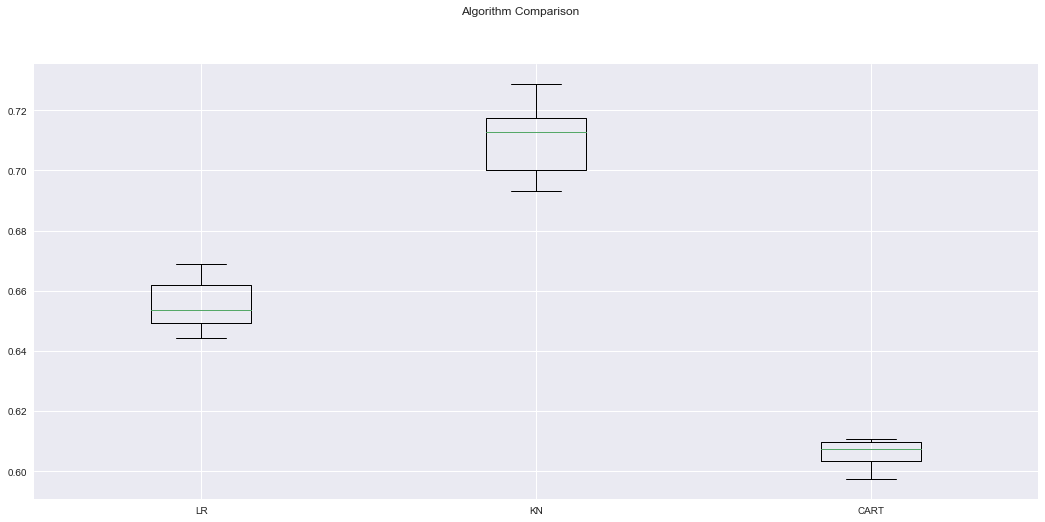

In [31]:
# Visualize comparisons with box plot

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

due to the data types both Linear regression and KNN are affected so scaling is needed to see if that changes the outcome.

In [32]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('ScaledKN', Pipeline([('Scaler', StandardScaler()), ('KN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))

scaled_results = []
scaled_names = []

for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    scaled_results.append(cv_results)
    scaled_names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

ScaledLR: 0.655484 (0.008568)
ScaledKN: 0.701964 (0.009024)
ScaledCART: 0.607983 (0.009214)


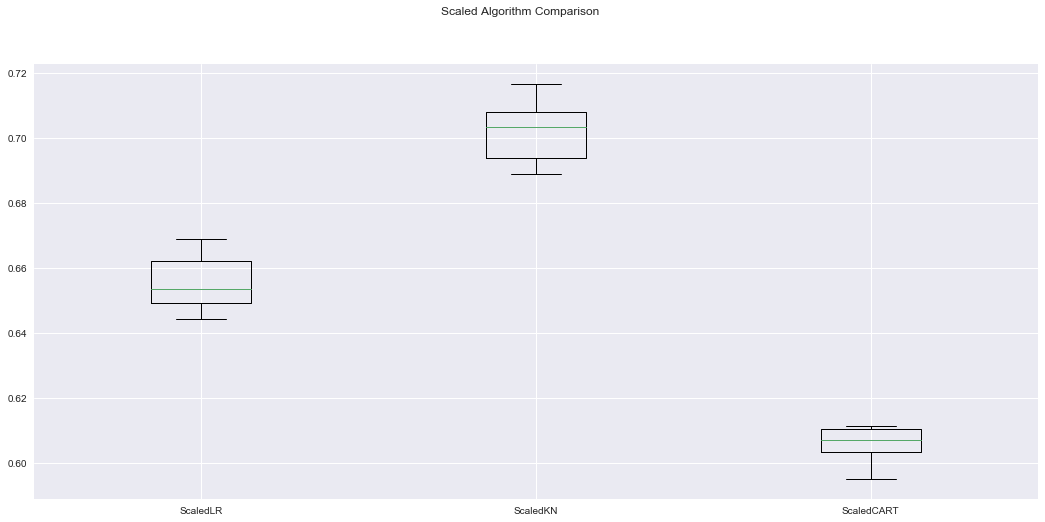

In [33]:
# Compare Algorithms

fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(scaled_results)
ax.set_xticklabels(scaled_names)
plt.show()

Scaling did not change the models much so KNN is the best.

we will see if any ensambles can further improve it.

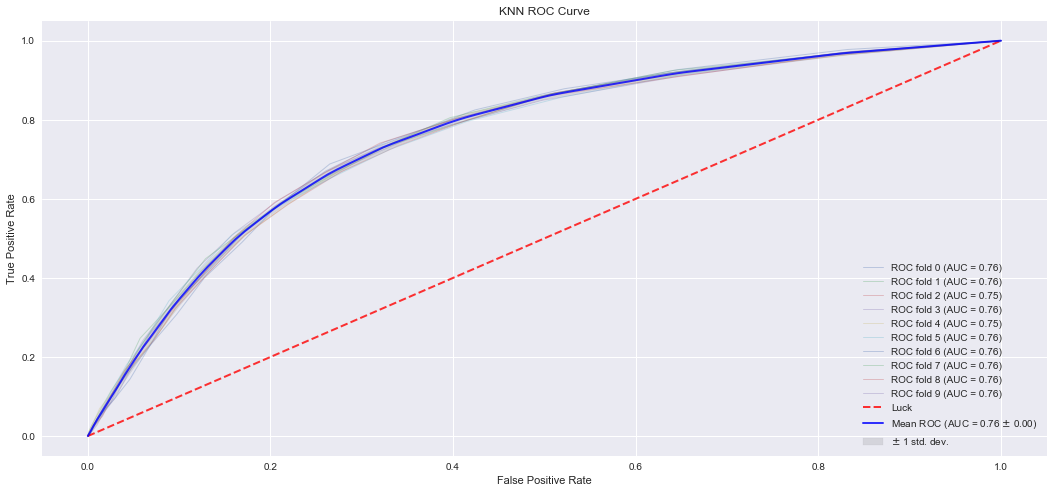

In [43]:
from scipy import interp
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10)
classifier = KNeighborsClassifier(n_neighbors=21)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [44]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))

ensemble_results = []
ensemble_names = []

for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    ensemble_results.append(cv_results)
    ensemble_names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

AB: 0.785990 (0.007558)
GBM: 0.793978 (0.007776)
RF: 0.727655 (0.008408)
ET: 0.721641 (0.010805)


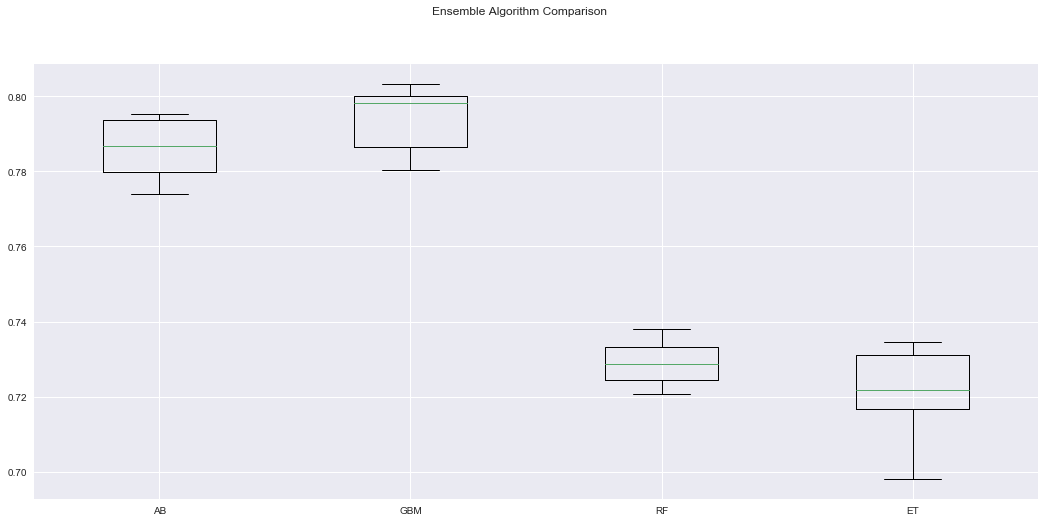

In [45]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(ensemble_results)
ax.set_xticklabels(ensemble_names)
plt.show()

It would appear that Gradient Boosted Decision Tree  is the best. 

# Final Optimization and Enhancement

In [40]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingClassifier(n_estimators= 80, max_depth=7, min_samples_split=1000, learning_rate=0.1,
                                  min_samples_leaf=50,
                                  max_features='sqrt',subsample=0.8,random_state=10)
model.fit(rescaledX, y_train)

# estimate accuracy on test set

rescaledTestX = scaler.transform(X_test)
predictions = model.predict(rescaledTestX)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[7346  463]
 [1512  679]]
             precision    recall  f1-score   support

        0.0       0.83      0.94      0.88      7809
        1.0       0.59      0.31      0.41      2191

avg / total       0.78      0.80      0.78     10000



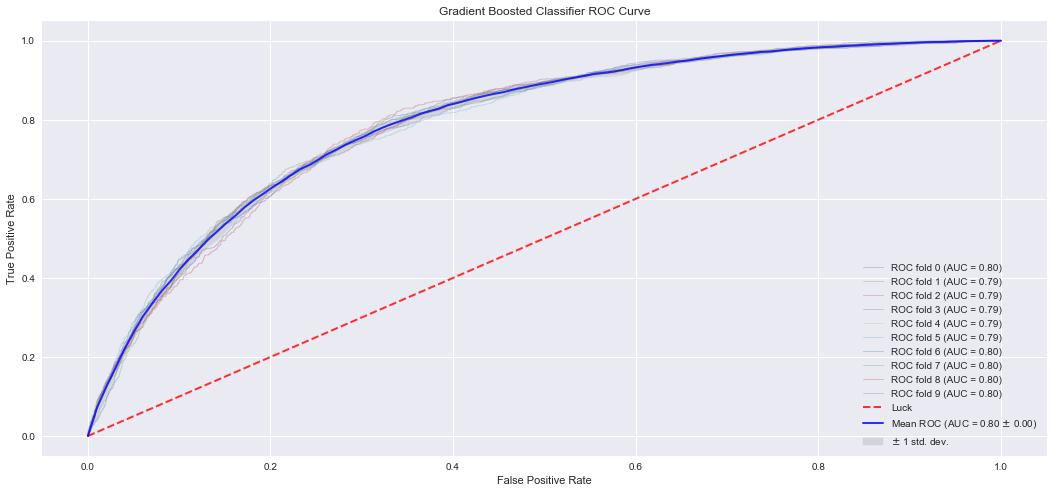

In [47]:
cv = StratifiedKFold(n_splits=10)
classifier = GradientBoostingClassifier(n_estimators= 80, max_depth=7, min_samples_split=1000, learning_rate=0.1,
                                  min_samples_leaf=50,
                                  max_features='sqrt',subsample=0.8,random_state=10)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosted Classifier ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Conclusion

with the current Data non-active users are easier to predict then active users. the amount used on weekdays is most important so incentivizing drivers on weekdays would be helpful. Most users are active in the first 30 days so they could find ways to make using the app afterwards better. King's Landing has market potential, and working on integrating the app into daily life. 